In [1]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, add, GlobalAveragePooling2D
from tensorflow.keras.utils import to_categorical, plot_model, image_dataset_from_directory
from skimage import io
import matplotlib.pyplot as plt, numpy as np, pandas as pd, tensorflow
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
train_ds = image_dataset_from_directory(
    "/content/drive/MyDrive/CSE428/Group_5/train",
    labels="inferred",
    label_mode="categorical",
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=100)

test_ds = image_dataset_from_directory(
    "/content/drive/MyDrive/CSE428/Group_5/test",
    labels="inferred",
    label_mode="categorical",
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=100)

Found 2150 files belonging to 5 classes.
Found 250 files belonging to 5 classes.


In [ ]:
# train_data = pd.read_csv("/content/drive/MyDrive/CSE428/Group_5/train.csv")
# test_data = pd.read_csv("/content/drive/MyDrive/CSE428/Group_5/test.csv")

# (X_train, y_train) = train_data.drop(['label'], axis=1), train_data['label']
# (X_test, y_test) = test_data.drop(['label'], axis=1), test_data['label']

# print("shape of X_train =", X_train.shape)
# print("shape of y_train =", y_train.shape)

# print("shape of X_test =", X_test.shape)
# print("shape of y_test =", y_test.shape)

shape of X_train = (2150, 12288)
shape of y_train = (2150,)
shape of X_test = (250, 12288)
shape of y_test = (250,)


# Preprocessing dataset for CNN

In [ ]:
# # Flatten the inputs

# # X_train = X_train.reshape(X_train.shape[0], -1)
# # X_test = X_test.reshape(X_test.shape[0], -1)

# # Normalize the inputs
# X_train = X_train/255.0
# X_test = X_test/255.0

# # Convert images from (height x width) to (height x width x n_nchannels)
# # required for Keras
# X_train = np.expand_dims(X_train, axis=2) # (60000, 28, 28) -> (60000, 28, 28, 1)
# X_test = np.expand_dims(X_test, axis=2)

# X_train = np.expand_dims(X_train, axis=3) # (60000, 28, 28) -> (60000, 28, 28, 1)
# X_test = np.expand_dims(X_test, axis=3)

# # Convert the target to one-hot encoding
# number_of_classes = 5
# l = ['fence', 'pill-bottle', 'projectile', 'reel', 'snail']
# label = LabelEncoder()
# label.fit(l)
# y_train = label.transform(y_train)
# y_test = label.transform(y_test)
# y_train = to_categorical(y_train, num_classes=number_of_classes) 
# y_test = to_categorical(y_test, num_classes=number_of_classes) 


# print("shape of X =", X_train.shape)
# print("shape of y =", y_train.shape)

shape of X = (2150, 12288, 1, 1)
shape of y = (2150, 5)


In [4]:
train_ds

<_BatchDataset element_spec=(TensorSpec(shape=(None, 64, 64, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 5), dtype=tf.float32, name=None))>

In [5]:
# Parameters for the input layer
input_shape = (64, 64, 3)
print(input_shape)

(64, 64, 3)


# Model Definition - Method 1 (Sequential)

In [6]:
model = Sequential()

model.add( Input(shape=input_shape) )

model.add( Conv2D(64, kernel_size=3, 
                  strides=(2, 2), 
                  activation='relu', 
                  input_shape=input_shape) )

model.add( MaxPooling2D(pool_size=(3, 3), 
                        strides=(2, 2)) )

#1
model.add( Conv2D(64, kernel_size=3, 
                  strides=(1, 1), 
                  activation='relu', 
                  padding='same') )

#2
model.add( Conv2D(64, kernel_size=3, 
                  strides=(1, 1), 
                  activation='relu', 
                  padding='same') )

#3
model.add( Conv2D(64, kernel_size=3, 
                  strides=(1, 1), 
                  activation='relu', 
                  padding='same') )

#4
model.add( Conv2D(64, kernel_size=3, 
                  strides=(1, 1), 
                  activation='relu', 
                  padding='same') )

#5
model.add( Conv2D(64, kernel_size=3, 
                  strides=(1, 1), 
                  activation='relu', 
                  padding='same') )

#6
model.add( Conv2D(64, kernel_size=3, 
                  strides=(1, 1), 
                  activation='relu', 
                  padding='same') )

#7
model.add( Conv2D(64, kernel_size=3, 
                  strides=(1, 1), 
                  activation='relu', 
                  padding='same') )

#8
model.add( Conv2D(64, kernel_size=3, 
                  strides=(1, 1), 
                  activation='relu', 
                  padding='same') )

#9
model.add( Conv2D(64, kernel_size=3, 
                  strides=(1, 1), 
                  activation='relu', 
                  padding='same' ))

#10
model.add( Conv2D(64, kernel_size=3, 
                  strides=(1, 1), 
                  activation='relu', 
                  padding='same') )

model.add( GlobalAveragePooling2D())
model.add( Flatten() )
model.add( Dense(5, activation='softmax') )

In [7]:
model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

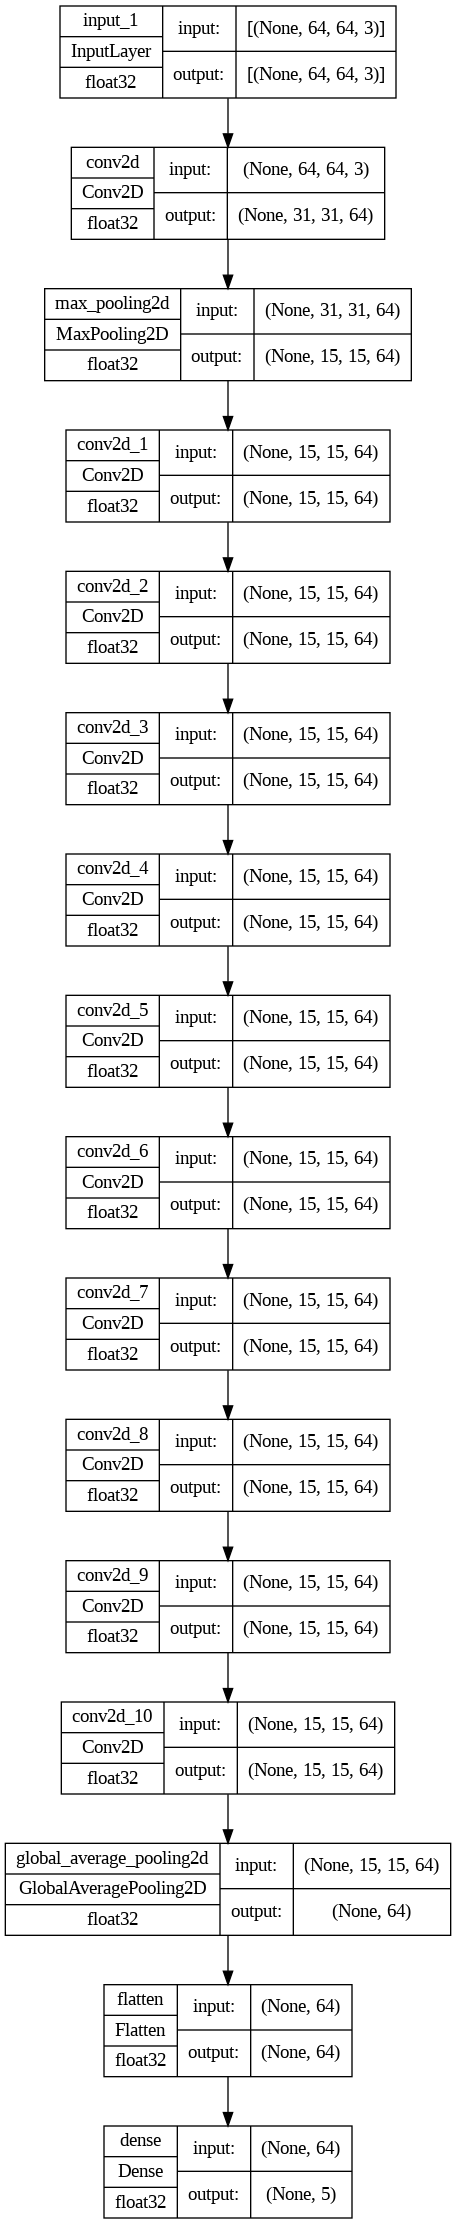

In [8]:
plot_model(model, show_shapes=True, show_dtype=True, show_layer_names=True)

In [9]:
X_train, y_train =  tuple(zip(*train_ds.unbatch()))
X_test, y_test =  tuple(zip(*test_ds.unbatch()))
X_train =  tensorflow.convert_to_tensor(X_train)
X_test =  tensorflow.convert_to_tensor(X_test)
y_train =  tensorflow.convert_to_tensor(y_train)
y_test =  tensorflow.convert_to_tensor(y_test)

In [10]:
model.fit(X_train, y_train, epochs=100, verbose=1)

Epoch 1/100
68/68 [==============================] - 11s 12ms/step - loss: 1.5707 - accuracy: 0.2907
Epoch 2/100
68/68 [==============================] - 1s 9ms/step - loss: 1.5763 - accuracy: 0.2744
Epoch 3/100
68/68 [==============================] - 1s 9ms/step - loss: 1.5450 - accuracy: 0.3107
Epoch 4/100
68/68 [==============================] - 1s 8ms/step - loss: 1.5530 - accuracy: 0.3135
Epoch 5/100
68/68 [==============================] - 1s 8ms/step - loss: 1.5398 - accuracy: 0.3270
Epoch 6/100
68/68 [==============================] - 1s 8ms/step - loss: 1.4361 - accuracy: 0.4065
Epoch 7/100
68/68 [==============================] - 0s 7ms/step - loss: 1.3988 - accuracy: 0.4316
Epoch 8/100
68/68 [==============================] - 1s 7ms/step - loss: 1.3729 - accuracy: 0.4563
Epoch 9/100
68/68 [==============================] - 1s 7ms/step - loss: 1.3643 - accuracy: 0.4567
Epoch 10/100
68/68 [==============================] - 1s 8ms/step - loss: 1.3530 - accuracy: 0.4512
Epoch 1

In [14]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

8/8 [==============================] - 0s 4ms/step


In [19]:
loss_train, pred_train = model.evaluate(X_train, y_train)
print("Training accuracy (%) =", pred_train*100)

68/68 [==============================] - 0s 5ms/step - loss: 0.9497 - accuracy: 0.6423
Training accuracy (%) = 64.23255801200867


In [20]:
cnf_matrix=confusion_matrix(np.argmax(y_train, axis=1), np.argmax(y_pred_train, axis=1))
print(cnf_matrix)

[[281   0 100   0 119]
 [  0 276  50   0 174]
 [  4   3 433   0  60]
 [  6   7 162   0  75]
 [  0   1   8   0 391]]


In [21]:
FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix) 
FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
TP = np.diag(cnf_matrix)
TN = cnf_matrix.sum() - (FP + FN + TP)
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)

# Specificity or true negative rate
TNR = TN/(TN+FP) 

# Precision or positive predictive value
PPV = TP/(TP+FP)

# Negative predictive value
NPV = TN/(TN+FN)

# F1 Score
F1 = 2*((PPV)*(TPR)/(PPV + TPR))  

<ipython-input-21-f1c84500f86e>:17: RuntimeWarning: invalid value encountered in true_divide
  PPV = TP/(TP+FP)


In [22]:
first = []
second = []
third = []
fourth = []
fifth = []
t=[]

t_ML2=[]
t_ML2_v2=[]


def formTable(a):
  
  for i in range(len(a)):
    if i == 0:
      first.append(round(a[i],2))
    if i == 1:
      second.append(round(a[i],2))
    if i == 2:
      third.append(round(a[i],2))
    if i == 3:
      fourth.append(round(a[i],2))
    if i == 4:
      fifth.append(round(a[i],2))

formTable(TPR)
formTable(TNR)
formTable(PPV)
formTable(NPV)
formTable(F1)

t.append(first)
t.append(second)
t.append(third)
t.append(fourth)
t.append(fifth)
# print(t)

In [23]:
slst=[]
slst_ML2=[]
slst_ML2_t6 =[]
def formt(t):
  s0=0
  s1=0
  s2=0
  s3=0
  s4=0
  

  for i in range(len(t)+1):
    for j in range(len(t)):
      if i!=0:
        break
      else:
        s0+= t[j][i]
      avg_s0 = s0/len(t)
    for j in range(len(t)):
      if i!=1:
        break
      else:
        s1+= t[j][i]
      avg_s1 = s1/len(t)
    for j in range(len(t)):
      if i!=2:
        break
      else:
        s2+= t[j][i]
      avg_s2 = s2/len(t)
    for j in range(len(t)):
      if i!=3:
        break
      else:
        s3+= t[j][i]
      avg_s3 = s3/len(t)
    for j in range(len(t)):
      if i!=4:
        break
      else:
        s4+= t[j][i]
      avg_s4 = s4/len(t)
  
  slst.append(round(avg_s0,2))
  slst.append(round(avg_s1,2))
  slst.append(round(avg_s2,2))
  slst.append(round(avg_s3,2))
  slst.append(round(avg_s4,2))
  # print(slst)
  t.append(slst)
  return t
formt(t)

[[0.56, 0.99, 0.97, 0.88, 0.71],
 [0.55, 0.99, 0.96, 0.88, 0.7],
 [0.87, 0.81, 0.58, 0.95, 0.69],
 [0.0, 1.0, nan, 0.88, nan],
 [0.98, 0.76, 0.48, 0.99, 0.64],
 [0.59, 0.91, nan, 0.92, nan]]

In [24]:
df = pd.DataFrame(t, columns = ['Sensitivity', 'Specificity', 'PPV', 'NPV', 'F1 Score'], index=['0', '1', '2', '3', '4','avg'])
print(df)

     Sensitivity  Specificity   PPV   NPV  F1 Score
0           0.56         0.99  0.97  0.88      0.71
1           0.55         0.99  0.96  0.88      0.70
2           0.87         0.81  0.58  0.95      0.69
3           0.00         1.00   NaN  0.88       NaN
4           0.98         0.76  0.48  0.99      0.64
avg         0.59         0.91   NaN  0.92       NaN


In [25]:
loss_test, pred_test = model.evaluate(X_test, y_test)
print("Testing accuracy (%) =", pred_test*100)

8/8 [==============================] - 0s 6ms/step - loss: 1.2365 - accuracy: 0.4880
Testing accuracy (%) = 48.80000054836273


In [30]:
cnf_matrix=confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred_test, axis=1))
print(cnf_matrix)

[[26  0 16  0  8]
 [ 0 16  7  0 27]
 [ 1  4 37  0  8]
 [ 3  4 27  0 16]
 [ 0  2  5  0 43]]


In [31]:
FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix) 
FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
TP = np.diag(cnf_matrix)
TN = cnf_matrix.sum() - (FP + FN + TP)
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)

# Specificity or true negative rate
TNR = TN/(TN+FP) 

# Precision or positive predictive value
PPV = TP/(TP+FP)

# Negative predictive value
NPV = TN/(TN+FN)

# F1 Score
F1 = 2*((PPV)*(TPR)/(PPV + TPR))  

<ipython-input-31-f1c84500f86e>:17: RuntimeWarning: invalid value encountered in true_divide
  PPV = TP/(TP+FP)


In [32]:
first = []
second = []
third = []
fourth = []
fifth = []
t=[]

t_ML2=[]
t_ML2_v2=[]


def formTable(a):
  
  for i in range(len(a)):
    if i == 0:
      first.append(round(a[i],2))
    if i == 1:
      second.append(round(a[i],2))
    if i == 2:
      third.append(round(a[i],2))
    if i == 3:
      fourth.append(round(a[i],2))
    if i == 4:
      fifth.append(round(a[i],2))

formTable(TPR)
formTable(TNR)
formTable(PPV)
formTable(NPV)
formTable(F1)

t.append(first)
t.append(second)
t.append(third)
t.append(fourth)
t.append(fifth)
# print(t)

In [33]:
slst=[]
slst_ML2=[]
slst_ML2_t6 =[]
def formt(t):
  s0=0
  s1=0
  s2=0
  s3=0
  s4=0
  

  for i in range(len(t)+1):
    for j in range(len(t)):
      if i!=0:
        break
      else:
        s0+= t[j][i]
      avg_s0 = s0/len(t)
    for j in range(len(t)):
      if i!=1:
        break
      else:
        s1+= t[j][i]
      avg_s1 = s1/len(t)
    for j in range(len(t)):
      if i!=2:
        break
      else:
        s2+= t[j][i]
      avg_s2 = s2/len(t)
    for j in range(len(t)):
      if i!=3:
        break
      else:
        s3+= t[j][i]
      avg_s3 = s3/len(t)
    for j in range(len(t)):
      if i!=4:
        break
      else:
        s4+= t[j][i]
      avg_s4 = s4/len(t)
  
  slst.append(round(avg_s0,2))
  slst.append(round(avg_s1,2))
  slst.append(round(avg_s2,2))
  slst.append(round(avg_s3,2))
  slst.append(round(avg_s4,2))
  # print(slst)
  t.append(slst)
  return t
formt(t)

[[0.52, 0.98, 0.87, 0.89, 0.65],
 [0.32, 0.95, 0.62, 0.85, 0.42],
 [0.74, 0.72, 0.4, 0.92, 0.52],
 [0.0, 1.0, nan, 0.8, nan],
 [0.86, 0.7, 0.42, 0.95, 0.57],
 [0.49, 0.87, nan, 0.88, nan]]

In [34]:
df = pd.DataFrame(t, columns = ['Sensitivity', 'Specificity', 'PPV', 'NPV', 'F1 Score'], index=['0', '1', '2', '3', '4','avg'])
print(df)

     Sensitivity  Specificity   PPV   NPV  F1 Score
0           0.52         0.98  0.87  0.89      0.65
1           0.32         0.95  0.62  0.85      0.42
2           0.74         0.72  0.40  0.92      0.52
3           0.00         1.00   NaN  0.80       NaN
4           0.86         0.70  0.42  0.95      0.57
avg         0.49         0.87   NaN  0.88       NaN
